# Foundations of Machine Learning Frameworks Lab-10
Name: Aniket Tiwari     
Id: 8866818

In [48]:
# Importing the necessary libraries 

from tensorflow import keras
from tensorflow.keras import layers, models
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import os
from collections import Counter
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model


import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

### Getting the data

In [49]:
import os, shutil, pathlib

original_dir = pathlib.Path("S:/Foundations of Machine learning/train/train")
new_base_dir = pathlib.Path("S:/Foundations of Machine learning/kaggle_dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [50]:
data_folder = pathlib.Path('../../../../kaggle_dogs_vs_cats_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32, 
    label_mode='binary')
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32,
        label_mode='binary')
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32,
        label_mode='binary')

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


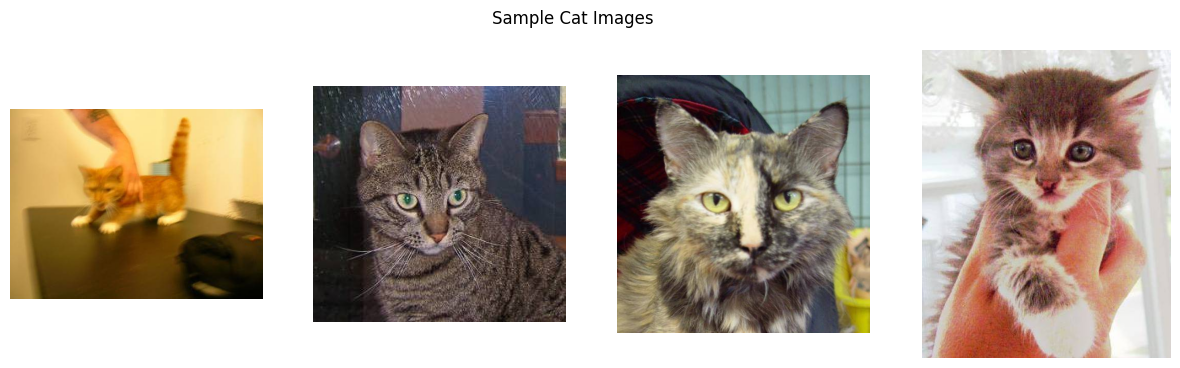

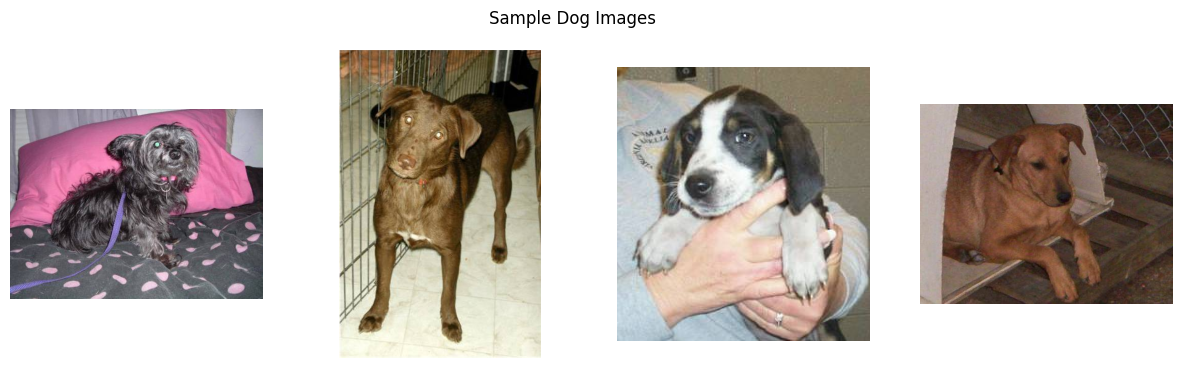

Number of cat images in training set: 1000
Number of dog images in training set: 1000


In [51]:
# Paths to your training, validation, and test directories
train_dir = 'S:/Foundations of Machine learning/kaggle_dogs_vs_cats_small/train'
validation_dir = 'S:/Foundations of Machine learning/kaggle_dogs_vs_cats_small/validation'
test_dir = 'S:/Foundations of Machine learning/kaggle_dogs_vs_cats_small/test'

def display_sample_images(class_dir, title, n=4):
    fig, axes = plt.subplots(1, n, figsize=(15, 4))
    fig.suptitle(title)
    images = os.listdir(class_dir)[:n]
    for ax, image in zip(axes, images):
        img = Image.open(os.path.join(class_dir, image))
        ax.imshow(img)
        ax.axis('off')
    plt.show()

def analyze_image_sizes(directory):
    widths, heights = [], []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
    return widths, heights

def plot_image_sizes(widths, heights):
    plt.figure(figsize=(10, 5))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Image Sizes')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.show()

# Display sample images for both classes
display_sample_images(os.path.join(train_dir, 'cat'), 'Sample Cat Images')
display_sample_images(os.path.join(train_dir, 'dog'), 'Sample Dog Images')

# Analyze class distribution
train_cats = len(os.listdir(os.path.join(train_dir, 'cat')))
train_dogs = len(os.listdir(os.path.join(train_dir, 'dog')))
print(f"Number of cat images in training set: {train_cats}")
print(f"Number of dog images in training set: {train_dogs}")

# You might need to adjust the paths according to your directory structure


In [60]:
# Define the input shape
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)  # Correct for binary classification

model_vanilla = models.Model(inputs=inputs, outputs=outputs)
model_vanilla.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint(
    "best_model_custom_cnn.hdf5", 
    save_best_only=True,
    monitor='val_accuracy'
)

history_vanilla = model_vanilla.fit(
    train_dataset, 
    epochs=15,
    validation_data=validation_dataset,
    callbacks=[checkpoint_cb] 
)

Epoch 1/15
63/63 [==============================] - 11s 163ms/step - loss: 1.5457 - accuracy: 0.5370 - val_loss: 0.7017 - val_accuracy: 0.5320
Epoch 2/15
63/63 [==============================] - 11s 172ms/step - loss: 0.6821 - accuracy: 0.5660 - val_loss: 0.6791 - val_accuracy: 0.5870
Epoch 3/15
63/63 [==============================] - 10s 159ms/step - loss: 0.6230 - accuracy: 0.6755 - val_loss: 0.6464 - val_accuracy: 0.6120
Epoch 4/15
63/63 [==============================] - 10s 162ms/step - loss: 0.4973 - accuracy: 0.7645 - val_loss: 0.6970 - val_accuracy: 0.6150
Epoch 5/15
63/63 [==============================] - 11s 176ms/step - loss: 0.3474 - accuracy: 0.8515 - val_loss: 0.8740 - val_accuracy: 0.5870
Epoch 6/15
63/63 [==============================] - 13s 198ms/step - loss: 0.1987 - accuracy: 0.9270 - val_loss: 0.9529 - val_accuracy: 0.6280
Epoch 7/15
63/63 [==============================] - 13s 196ms/step - loss: 0.0968 - accuracy: 0.9705 - val_loss: 1.1557 - val_accuracy: 0.6370

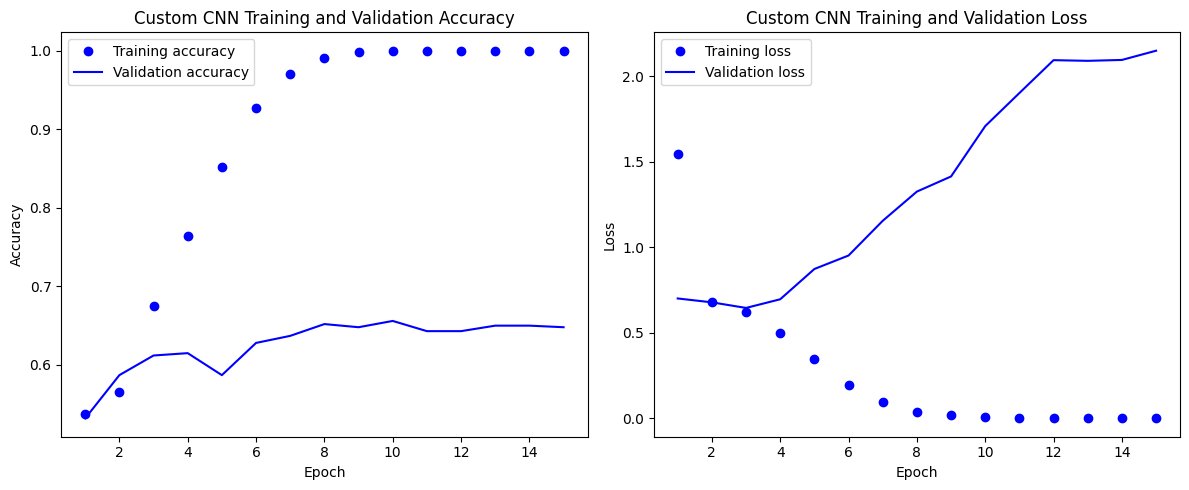

In [73]:
acc_vanilla = history_vanilla.history['accuracy']
val_acc_vanilla = history_vanilla.history['val_accuracy']
loss_vanilla = history_vanilla.history['loss']
val_loss_vanilla = history_vanilla.history['val_loss']

epochs_vanilla = range(1, len(acc_vanilla) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_vanilla, acc_vanilla, 'bo', label='Training accuracy')
plt.plot(epochs_vanilla, val_acc_vanilla, 'b', label='Validation accuracy')
plt.title('Custom CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_vanilla, loss_vanilla, 'bo', label='Training loss')
plt.plot(epochs_vanilla, val_loss_vanilla, 'b', label='Validation loss')
plt.title('Custom CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training Accuracy:

- By the 6 epoch, the training accuracy has rapidly increased from its initial value of roughly 70% to nearly 100%.
This may imply overfitting since it shows that the model can fit the training set very well—possibly too well.   

Validation Accuracy:

- During the first few epochs, the validation accuracy fluctuates a lot before stabilizing.
Another hallmark of overfitting is that it does not significantly improve over time and typically remains lower than the training accuracy.   

Training Loss:

- As the model learns from the training data, the training loss should first drop dramatically before plateauing close to zero.   

Validation Loss:

- The validation loss first declines but, as is typical with overfitting, begins to rise after the sixth epoch.
Even if the model improves on the training data, its loss on new data (validation data) increases.   

### VGG-16 

In [61]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Freezing the weights of VGG-16

In [62]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Data Augmentation

In [63]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomBrightness(0.3),
        layers.RandomContrast(0.1)
    ]
)

In [65]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_vgg = ModelCheckpoint(
    "best_model_vgg16_cnn.hdf5", 
    save_best_only=True,
    monitor='val_accuracy'
)

history_vgg = model.fit(
    train_dataset, 
    epochs=15,
    validation_data=validation_dataset,
    callbacks=[checkpoint_vgg] 
)



Epoch 1/15
63/63 [==============================] - 50s 694ms/step - loss: 0.0000e+00 - accuracy: 0.4995 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 38s 609ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 39s 616ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/15
63/63 [==============================] - 38s 597ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/15
63/63 [==============================] - 62s 982ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/15
63/63 [==============================] - 72s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/15
63/63 [==============================] - 36s 565ms/step - loss: 0.0000e+00 - accuracy:

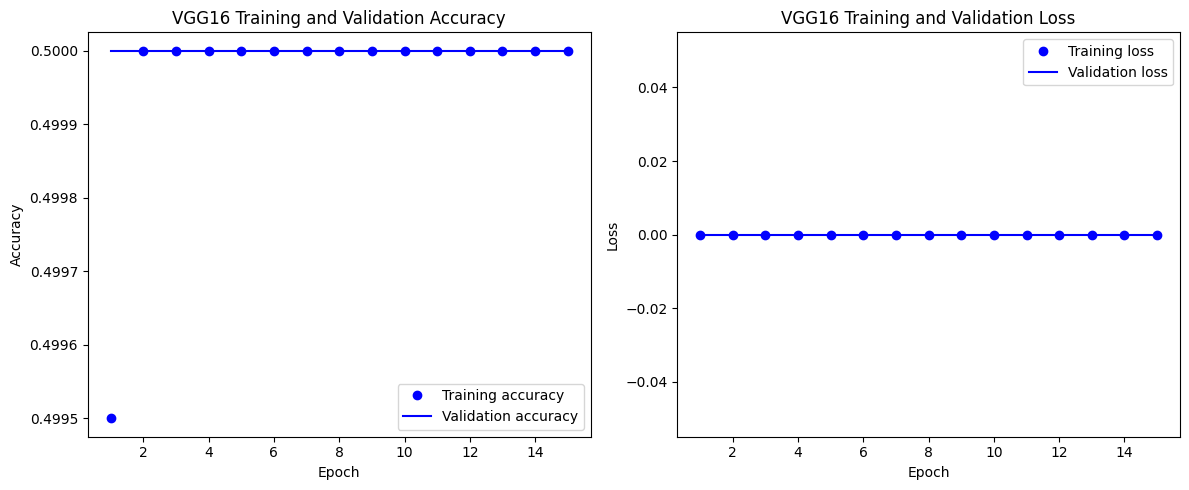

In [72]:
acc_vgg = history_vgg.history['accuracy']
val_acc_vgg = history_vgg.history['val_accuracy']
loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']

epochs_vgg = range(1, len(acc_vgg) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_vgg, acc_vgg, 'bo', label='Training accuracy')
plt.plot(epochs_vgg, val_acc_vgg, 'b', label='Validation accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_vgg, loss_vgg, 'bo', label='Training loss')
plt.plot(epochs_vgg, val_loss_vgg, 'b', label='Validation loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


- Flat Accuracy and Loss: The model is not learning from the data over epochs, as evidenced by the remarkably flat training accuracy and loss. In a similar vein, loss and validation accuracy are likewise flat.   

- Around 50% accuracy: For a binary classification task, the accuracy is roughly 50%, which is the predicted accuracy of random guessing. This implies that the model's performance is no greater than that of chance.   

- Loss near Zero: As the model learns, the loss should normally decrease, however in this case, it is close to zero and does not demonstrate any improvement.   

- No Overfitting Observed: Generally speaking, overfitting is indicated by either an increase in training accuracy without a corresponding rise in validation accuracy or a decrease in training loss along with an increase in validation loss. Although the performance is at chance level, the lack of divergence between the training and validation metrics in this case suggests that there isn't overfitting. Nevertheless, this is not always a good finding.   

- Possible Problems: The model's performance raises the possibility of problems with the model's architecture, learning rate, data preparation, or the computation or reporting of accuracy and loss. It is necessary to conduct more research on the model setup and training procedure.   



In [57]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [58]:
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-7),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    history_fine = model.fit(
        train_dataset, 
        epochs=15, 
        validation_data=validation_dataset
    )

Epoch 1/15


63/63 [==============================] - 86s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 85s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 86s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/15
63/63 [==============================] - 60s 942ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/15
63/63 [==============================] - 38s 608ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/15
63/63 [==============================] - 66s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/15
63/63 [==============================] - 42s 665ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 

In [68]:
best_model_vgg16 = keras.models.load_model("best_model_vgg16_cnn.hdf5")
best_model_custom_cnn = keras.models.load_model("best_model_custom_cnn.hdf5")


In [69]:
vgg16_eval = best_model_vgg16.evaluate(validation_dataset)
custom_cnn_eval = best_model_custom_cnn.evaluate(validation_dataset)
print(f"VGG16 Model - Validation Accuracy: {vgg16_eval[1]}")
print(f"Custom CNN Model - Validation Accuracy: {custom_cnn_eval[1]}")


32/32 [==============================] - 2s 54ms/step - loss: 1.7095 - accuracy: 0.6560
VGG16 Model - Validation Accuracy: 0.5
Custom CNN Model - Validation Accuracy: 0.656000018119812


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def get_predictions(model, dataset):
    predictions = model.predict(dataset)
    predictions = np.round(predictions).astype(int)
    labels = np.concatenate([y for x, y in dataset], axis=0)
    return predictions, labels

predictions_vgg16, labels_vgg16 = get_predictions(best_model_vgg16, validation_dataset)
predictions_custom, labels_custom = get_predictions(best_model_custom, validation_dataset)

print("VGG16 Model")
print(classification_report(labels_vgg16, predictions_vgg16))
print(confusion_matrix(labels_vgg16, predictions_vgg16))

print("Custom Model")
print(classification_report(labels_custom, predictions_custom))
print(confusion_matrix(labels_custom, predictions_custom))


32/32 [==============================] - 2s 49ms/step
VGG16 Model
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       500
         1.0       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000

[[500   0]
 [500   0]]
Custom Model
              precision    recall  f1-score   support

         0.0       0.49      0.55      0.52       500
         1.0       0.48      0.42      0.45       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.49      0.49      0.48      1000

[[277 223]
 [291 209]]


VGG16 Model:    
- Precision: The model's accuracy for class 0 is 0.50, which indicates that 50% of the time it predicts correctly. It never accurately predicts class 1, as seen by its precision of 0.00 for that class.   
- Recall: For class 0, the model's recall is 1.00, which means that 100% of class 0 occurrences are properly identified. It cannot, however, correctly identify any instances of class 1; instead, it has a recall of 0.00 for that class.   
- F1-Score: Class 0 has a respectable f1-score of 0.67, whereas class 1 has a dismal f1-score of 0.00.   
- Accuracy: In a balanced dataset with two classes, random guessing might likewise yield an overall accuracy of 50%.   
- Confusion Matrix: This shows that all instances are predicted by the model to be class 0. This is a blatant example of a model that is completely unable to discriminate between the two classes.   


Custom Model:   
- Precision: This shows that when the model predicts a class, it is less likely to be correct than not. The precision is about split between the two classes, but it is less than 50% for both.   
- Recall: For class 0 compared to class 1, the recall is marginally greater, indicating that the model is marginally more accurate in locating class 0 occurrences.   
- F1-Score: Although the f1-scores are likewise very balanced, they point to a model that is not operating at a very high level. Compared to a flawless performance of 1.00, they are more akin to 0.50.   
- Accuracy: The total accuracy is slightly less than 50%, which is comparable to a random guess.  
- Confusion Matrix: The Custom CNN model predicts both classes, in contrast to the VGG16 model, however it produces a lot of mistakes, including a sizable amount of false positives and false negatives.    


General insights:   
- It appears that the VGG16 model has "collapsed" to the point that it can only predict one class for every input. There could be a number of reasons for this, such as a problem with the model's configuration, the learning process, or the data that the model was trained on.   
- Although it's not quite up to par for a binary classifier, the Custom CNN model can yet be improved.   
- Although accuracy is not deceptive due to the dataset's balanced structure (equal numbers of each classes), in all scenarios the performance is no better than chance.   
- It would be beneficial to fine-tune both models more, possibly looking at the training length, learning rate, model architecture, data preprocessing, and class imbalance (if any).   
- Overfitting may be addressed by regularization strategies, additional data, or data augmentation, as demonstrated in particular with the Custom CNN model.   